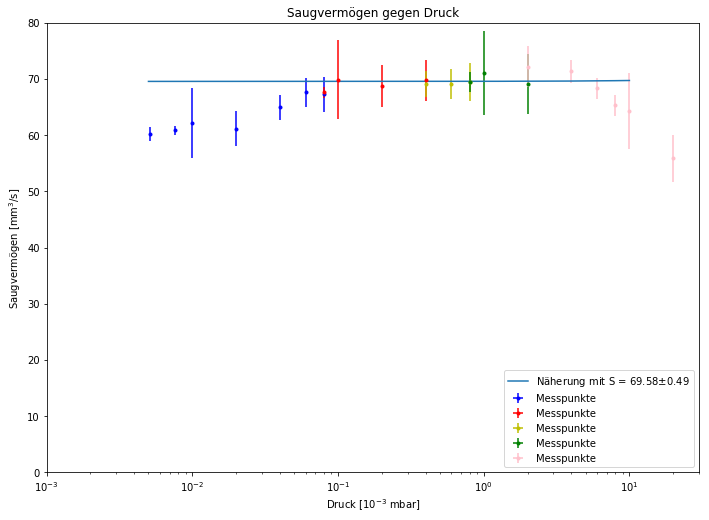

69.57658247315243 0.494095223888067


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def Saug(V, t, p):
    return V/t*(1000/p)

def dS(V, t, p, dp):
    return V/t*(1000/p)*np.sqrt((0.5/t)**2+(dp/p)**2)
    


vol = np.array([60,60,60,60,60,60,60])
t = np.array([195.39, 129.73, 96.46, 49.06, 23.10, 14.78, 11.15])
p = np.array([5.1e-6, 7.6e-6, 1.0e-5, 2.0e-5, 4.0e-5, 6.0e-5, 8.0e-5])
dp = np.array([1e-7, 1e-7, 1e-6, 1e-6, 1e-6, 1e-6, 1e-6])

vol2 = np.array([300, 300, 300, 300])
t2 = np.array([55.46, 42.92, 21.81, 10.75])
p2 = np.array([8.0e-5, 1e-4, 2e-4, 4e-4])
dp2 = np.array([1e-6, 1e-5, 1e-5, 1e-5])

vol3 = np.array([600, 600, 600])
t3 = np.array([21.72, 14.48, 10.8])
p3 = np.array([4.0e-4, 6.0e-4, 8.0e-4])
dp3 = np.array([1e-5, 1e-5, 1e-5])

vol4 = np.array([1200, 1200, 1200])
t4 = np.array([21.58, 16.89, 8.68])
p4 = np.array([8.0e-4, 1.0e-3, 2.0e-3])
dp4 = np.array([1e-5, 1e-4, 1e-4])

vol5 = np.array([1e4,1e4,1e4,1e4,1e4,1e4])
t5 = np.array([69.29, 35.02, 24.39, 19.14, 15.56, 8.95])
p5 = np.array([2e-3, 4e-3, 6e-3, 8e-3, 1e-2, 2e-2])
dp5 = np.array([1e-4, 1e-4, 1e-4, 1e-4, 1e-3, 1e-3])

plt.errorbar(p*1e3, Saug(vol, t, p)/1e6, dS(vol, t, p, dp)/1e6, dp, fmt = ".", color="b",label="Messpunkte")
plt.errorbar(p2*1e3, Saug(vol2, t2, p2)/1e6, dS(vol2, t2, p2, dp2)/1e6, dp2, fmt = ".", color="r",label="Messpunkte")
plt.errorbar(p3*1e3, Saug(vol3, t3, p3)/1e6, dS(vol3, t3, p3, dp3)/1e6, dp3, fmt = ".", color="y",label="Messpunkte")
plt.errorbar(p4*1e3, Saug(vol4, t4, p4)/1e6, dS(vol4, t4, p4, dp4)/1e6, dp4, fmt = ".", color="g",label="Messpunkte")
plt.errorbar(p5*1e3, Saug(vol5, t5, p5)/1e6, dS(vol5, t5, p5, dp5)/1e6, dp5, fmt = ".", color="pink",label="Messpunkte")

x = np.array([1e-4, 2e-4, 4e-4, 6.0e-4, 8.0e-4, 1.0e-3, 2.0e-3])*1e3
y = np.array([300/42.92/1e-4, 300/21.81/2e-4, 300/10.75/4e-4, 600/14.48/6e-4, 600/10.8/8e-4, 1200/16.89/1e-3, 1200/8.68/2e-3])*1000/1e6

def f(x, a, b):
    return a*x+b
popt, pcov=curve_fit(f, x, y)

xlin = np.linspace(0.005,10,10000)
plt.plot(xlin, f(xlin, *popt),label="Näherung mit S = {:.2f}$\pm${:.2f}".format(popt[1],np.sqrt(pcov[1][1])))
plt.xlim(0.001,30)
plt.ylim(0,80)
plt.xscale('log')
plt.xlabel("Druck [10$^{-3}$ mbar]")
plt.ylabel("Saugvermögen [mm$^3$/s]")
plt.title("Saugvermögen gegen Druck")
plt.legend(loc='lower right')
plt.gcf().set_size_inches(11.69, 8.27)
plt.show()

print(popt[1], np.sqrt(pcov[1][1]))
S = popt[1]
S_f = np.sqrt(pcov[1][1])

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Nur Rohr:
p1_oben = np.array([6.0e-4, 7.5e-4, 1.0e-3, 2.1e-3, 4.0e-3, 6.0e-3, 8.0e-3, 1.0e-2, 2.0e-2, 4.0e-2, 6.1e-2, 8.1e-2, 1.0e-1, 2.0e-1, 4.0e-1, 6.0e-1, 8.0e-1])
p1_unten = np.array([1.0e-5, 1.1e-5, 1.2e-5, 1.8e-5, 2.6e-5, 3.4e-5, 4.2e-5, 5.0e-5, 8.9e-5, 1.8e-4, 3.0e-4, 4.0e-4, 6.0e-4, 1.7e-3, 5.8e-3, 1.2e-2, 2.5e-2])

# Nur Blende:
p2_oben = np.array([2.6e-4, 4.9e-4, 7.4e-4, 1.0e-3, 2.5e-3, 5.0e-3, 7.4e-3, 1.0e-2, 2.5e-2, 5.0e-2, 7.4e-2, 1.0e-1, 2.6e-1, 5.0e-1, 7.6e-1, 1.0, 1.8])
p2_unten = np.array([1.6e-5, 1.8e-5, 2.1e-5, 2.3e-5, 3.7e-5, 5.9e-5, 7.9e-5, 9.7e-5, 2.1e-4, 4.2e-4, 6.2e-4, 8.6e-4, 2.5e-3, 5.1e-3, 8.2e-2, 1.1e-2, 2.5e-2])

# Serienschaltung von Rohr und Blende:
p3_oben = np.array([7.7e-4, 1.0e-3, 2.0e-3, 3.8e-3, 6.2e-3, 8.0e-3, 1.0e-2, 2.0e-2, 4.1e-2, 6.0e-2, 8.1e-2, 1.0e-1, 2.0e-1, 4.0e-1, 5.9e-1]) #, 8.0e-1, 1.0, 2.0])
p3_unten = np.array([1.3e-5, 1.3e-5, 1.6e-5, 2.2e-5, 2.8e-5, 3.3e-5, 3.8e-5, 6.2e-5, 1.2e-4, 1.9e-4, 2.5e-4, 3.6e-4, 9.1e-4, 2.7e-3, 4.6e-2]) #, 7.2e-2, 1.0e-2, 2.8e-2])


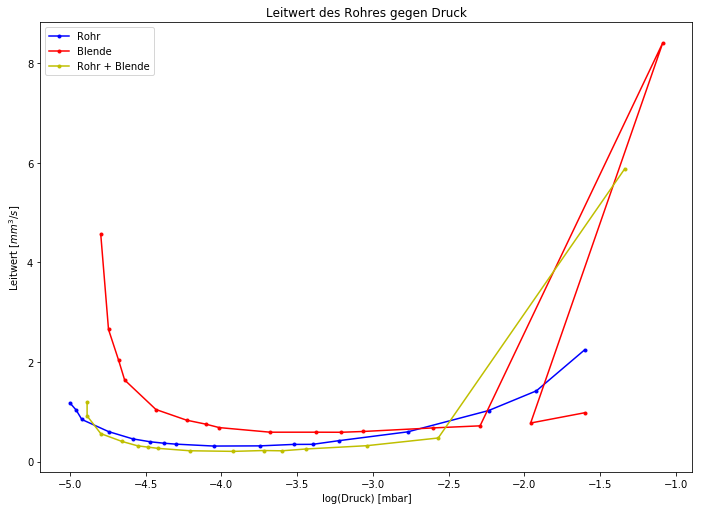

In [32]:

# Rohr
L1 = (p1_unten*S/(p1_oben-p1_unten)) 
#plt.errorbar(np.log10(p1_unten),L1, fmt = ".", color="b", label = "Rohr")
plt.plot(np.log10(p1_unten), L1,'b.-',label = "Rohr")

# Blende
L2 = (p2_unten*S/(p2_oben-p2_unten))
#plt.errorbar(np.log10(p2_unten),L2,fmt = ".",  color="red", label = "Blende")
plt.plot(np.log10(p2_unten), L2, 'r.-',label = "Blende")

# Rohr + Blende
L3 = (p3_unten*S/(p3_oben-p3_unten))
#plt.errorbar(np.log10(p3_unten), L3,fmt = ".", color="orange", label = "Rohr + Blende")
plt.plot(np.log10(p3_unten), L3,'y.-',label = "Rohr + Blende")


plt.xlabel("log(Druck) [mbar]")
plt.ylabel("Leitwert [$mm^3/s$]")
plt.title("Leitwert des Rohres gegen Druck")
plt.legend()
plt.gcf().set_size_inches(11.69, 8.27)
plt.show()

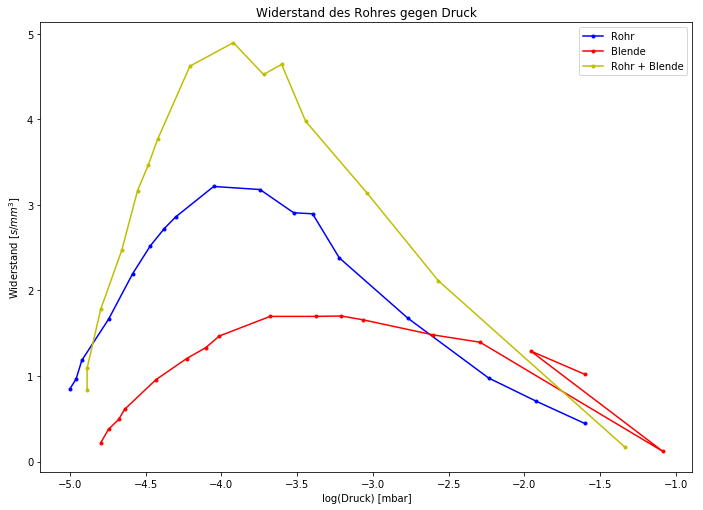

In [34]:

# Rohr
W1 = 1/(p1_unten*S/(p1_oben-p1_unten)) 
plt.plot(np.log10(p1_unten), W1, 'b.-',label = "Rohr")

# Blende
W2 = 1/(p2_unten*S/(p2_oben-p2_unten))
plt.plot(np.log10(p2_unten), W2, 'r.-', label = "Blende")

# Rohr + Blende
W3 = 1/(p3_unten*S/(p3_oben-p3_unten))
plt.plot(np.log10(p3_unten), W3,'y.-', label = "Rohr + Blende")


plt.xlabel("log(Druck) [mbar]")
plt.ylabel("Widerstand [$s/mm^3$]")
plt.title("Widerstand des Rohres gegen Druck")
plt.legend()
plt.gcf().set_size_inches(11.69, 8.27)
plt.show()

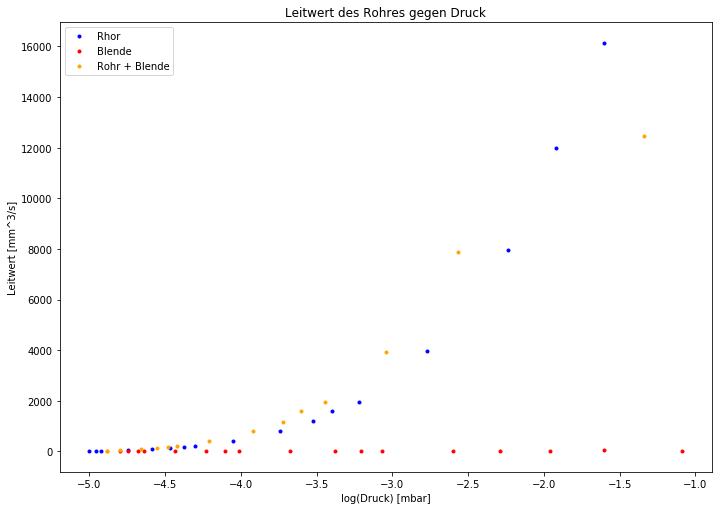

In [33]:
# Falsche Formel?
# Geometrische Grösse
d_Rohr = 12 #mm
l_Rohr = 100 #mm
d_Blende = 2.3 #mm

# Viskosität der Wasserdampf
eta = 0.00013
# Rohr
L1 = np.pi/8 * (d_Rohr/2)**4 * (p1_oben + p1_unten)/2 /(eta * l_Rohr)
plt.errorbar(np.log10(p1_unten), L1, fmt = ".", color="b", label = "Rhor")

# Blende
L2 = np.pi/8 * (d_Blende/2)**4 * (p2_oben + p2_unten)/2 /(eta * l_Rohr)
plt.errorbar(np.log10(p2_unten), L2, fmt = ".", color="red", label = "Blende")

# Rohr + Blende
L3 = np.pi/8 * (d_Rohr/2)**4 * (p3_oben + p3_unten)/2 /(eta * l_Rohr)
plt.errorbar(np.log10(p3_unten), L3, fmt = ".", color="orange", label = "Rohr + Blende")

plt.xlabel("log(Druck) [mbar]")
plt.ylabel("Leitwert [mm^3/s]")
plt.title("Leitwert des Rohres gegen Druck")
plt.legend()
plt.gcf().set_size_inches(11.69, 8.27)
plt.show()

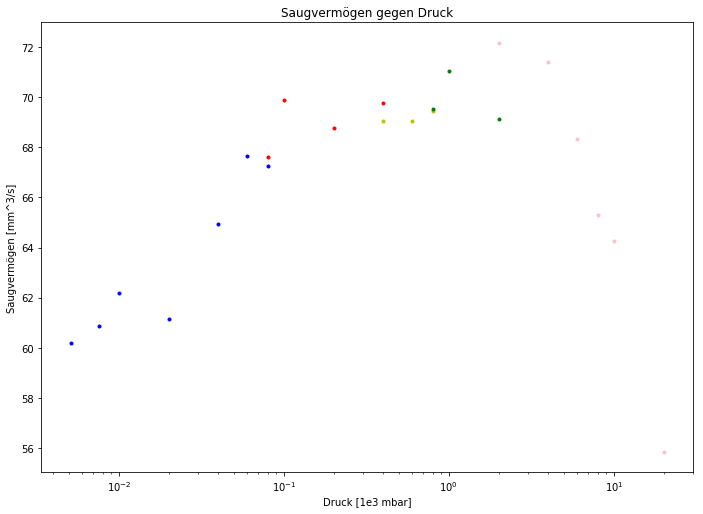

In [4]:
#old version of determining S


import numpy as np
import matplotlib.pyplot as plt

def Saug(V, t, p):
    return V/t*(1000/p)

vol = np.array([60,60,60,60,60,60,60])
dvol = np.array([1,1,1,1,1,1,1])
t = np.array([195.39, 129.73, 96.46, 49.06, 23.10, 14.78, 11.15])
p = np.array([5.1e-6, 7.6e-6, 1.0e-5, 2.0e-5, 4.0e-5, 6.0e-5, 8.0e-5])

vol2 = np.array([300, 300, 300, 300])
t2 = np.array([55.46, 42.92, 21.81, 10.75])
p2 = np.array([8.0e-5, 1e-4, 2e-4, 4e-4])

vol3 = np.array([600, 600, 600])
t3 = np.array([21.72, 14.48, 10.8])
p3 = np.array([4.0e-4, 6.0e-4, 8.0e-4])

vol4 = np.array([1200, 1200, 1200])
t4 = np.array([21.58, 16.89, 8.68])
p4 = np.array([8.0e-4, 1.0e-3, 2.0e-3])

vol5 = np.array([1e4,1e4,1e4,1e4,1e4,1e4])
t5 = np.array([69.29, 35.02, 24.39, 19.14, 15.56, 8.95])
p5 = np.array([2e-3, 4e-3, 6e-3, 8e-3, 1e-2, 2e-2])

plt.errorbar(p*1e3, Saug(vol, t, p)/1e6, fmt = ".", color="b")
plt.errorbar(p2*1e3, Saug(vol2, t2, p2)/1e6, fmt = ".", color="r")
plt.errorbar(p3*1e3, Saug(vol3, t3, p3)/1e6, fmt = ".", color="y")
plt.errorbar(p4*1e3, Saug(vol4, t4, p4)/1e6, fmt = ".", color="g")
plt.errorbar(p5*1e3, Saug(vol5, t5, p5)/1e6, fmt = ".", color="pink")
plt.xscale('log')
plt.xlabel("Druck [1e3 mbar]")
plt.ylabel("Saugvermögen [mm^3/s]")
plt.title("Saugvermögen gegen Druck")
plt.gcf().set_size_inches(11.69, 8.27)
plt.show()

